<a href="https://colab.research.google.com/github/ElaBenSaad1/Asst6/blob/main/Copy_of_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import pipeline

In [ ]:
#step 0: Sentiment analysis in python (using NLTK)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk #natural langiahe toolkit
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
!pwd
!ls

/content
sample_data


In [ ]:
import os

# Change the working directory to your desired path
#os.chdir('content')

# Verify the change
print(os.getcwd())


/content


In [ ]:
!pwd

/content


In [ ]:
#reading data
df = pd.read_csv("Copy of SEQ BMW Subsample - Sheet1.csv")
df.head()

,term,crn,faculty_bannerid,course_rating,instructor_rating,seq_vf,seq_if,seq_effort,seq_rec_course,seq_rec_instructor,sequence,course_level,course_title,course_number,course_section_number
0,200609,14442,A01033654,2.0,2.0,the most valuable feature of the course was by...,I really feel that the lecture componenet of t...,I felt good about my own efforts. I robably co...,To fulfill a major requirement and learn a lot...,"Yes, I felt that she was always willing to hel...",6096959,300 Level,Economics of Immigration,311,1
1,200609,14442,A01033654,2.0,1.0,NaN,NaN,NaN,Fulfill a major requirement in a manner that I...,"Professor Butcher is engaging, and presents th...",6093285,300 Level,Economics of Immigration,311,1
2,200609,14442,A01033654,1.0,1.0,The Problem sets of the courese were very help...,The speed of the course. This was partaly effe...,I did all the readings and attend all the lect...,I took this course for major requirement fullf...,"Yes, she will only get better.",6091462,300 Level,Economics of Immigration,311,1
3,200609,14442,A01033654,1.0,1.0,The most valuable feature of this course was t...,I really disliked having to do everything in g...,I put in a substantial amount of effort to com...,My objective in taking this course was to brus...,I would definitely recommend Prof. Butcher to ...,609680,300 Level,Economics of Immigration,311,1
4,200609,14442,A01033654,1.0,1.0,NaN,NaN,NaN,NaN,NaN,6095492,300 Level,Economics of Immigration,311,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
seq_vf = df["seq_vf"] #created a list

In [ ]:
## Basic NLTK
#test 0
example = seq_vf[3]
print(example)

The most valuable feature of this course was the focus on econometric techniques and analysis. I really enjoyed reading economic research papers which approached complex problems with different econometric techniques, and I learned how to read these types of papers and actually understand them. I feel like I can now analyze different economic problems with a more in-depth understanding. Also, I enjoyed working with STATA a lot. I got to brush up on my skills, and running regressions for the problem sets and the final project was interesting and fun.


In [ ]:
#tokenize (break down the sentences into words (but smarter))
tokens = nltk.word_tokenize(example)
print(tokens)

['The', 'most', 'valuable', 'feature', 'of', 'this', 'course', 'was', 'the', 'focus', 'on', 'econometric', 'techniques', 'and', 'analysis', '.', 'I', 'really', 'enjoyed', 'reading', 'economic', 'research', 'papers', 'which', 'approached', 'complex', 'problems', 'with', 'different', 'econometric', 'techniques', ',', 'and', 'I', 'learned', 'how', 'to', 'read', 'these', 'types', 'of', 'papers', 'and', 'actually', 'understand', 'them', '.', 'I', 'feel', 'like', 'I', 'can', 'now', 'analyze', 'different', 'economic', 'problems', 'with', 'a', 'more', 'in-depth', 'understanding', '.', 'Also', ',', 'I', 'enjoyed', 'working', 'with', 'STATA', 'a', 'lot', '.', 'I', 'got', 'to', 'brush', 'up', 'on', 'my', 'skills', ',', 'and', 'running', 'regressions', 'for', 'the', 'problem', 'sets', 'and', 'the', 'final', 'project', 'was', 'interesting', 'and', 'fun', '.']


In [ ]:
## VADER sentiment scoring (based on word grouping not the best but good to see)
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
#sentiment analyser object
sia = SentimentIntensityAnalyzer()

In [ ]:
#test 0.0
sia.polarity_scores('this is a very good burger')

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4927}

In [ ]:
#test 0.1
sia.polarity_scores('I hate waking up early')

{'neg': 0.552, 'neu': 0.448, 'pos': 0.0, 'compound': -0.5719}

In [ ]:
res_seq_vf = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['seq_vf']
    res_seq_vf[text] = sia.polarity_scores(str(text))

  0%|          | 0/3029 [00:00<?, ?it/s]

In [ ]:
res_seq_if = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['seq_if']
    res_seq_if[text] = sia.polarity_scores(str(text))

  0%|          | 0/3029 [00:00<?, ?it/s]

In [ ]:
res_seq_effort = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['seq_effort']
    res_seq_effort[text] = sia.polarity_scores(str(text))

  0%|          | 0/3029 [00:00<?, ?it/s]

In [ ]:
res_seq_rec_course = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['seq_rec_course']
    res_seq_rec_course[text] = sia.polarity_scores(str(text))

  0%|          | 0/3029 [00:00<?, ?it/s]

In [ ]:
res_seq_rec_instructor = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['seq_rec_instructor']
    res_seq_rec_instructor[text] = sia.polarity_scores(str(text))

  0%|          | 0/3029 [00:00<?, ?it/s]

In [ ]:
pd.DataFrame(res_seq_vf).T

,neg,neu,pos,compound
"the most valuable feature of the course was by far the project. Because we actually had to do the econometric research, I feel that I gained a greater understanding of how to apply stata and what a powerful tool it truly is. I also felt that having to present our presentations was a very useful experience for the presenters. As we had to put our material into an understandable package, it forced us to re-evaluate our undersntnaindg make suer we were actually accomplishing our goals.",0.032,0.779,0.188,0.9244
NaN,0.000,1.000,0.000,0.0000
"The Problem sets of the courese were very helpful. I thought they were a great way to perfect my Econometrics and really use it in upper-level economics courses. I also really thought that the reading were a great asset. Although the syllabus was little amibition, the readings were great. The midterm was very fair and a great assesment of my skills and understanding of the materials.",0.033,0.627,0.341,0.9790
"The most valuable feature of this course was the focus on econometric techniques and analysis. I really enjoyed reading economic research papers which approached complex problems with different econometric techniques, and I learned how to read these types of papers and actually understand them. I feel like I can now analyze different economic problems with a more in-depth understanding. Also, I enjoyed working with STATA a lot. I got to brush up on my skills, and running regressions for the problem sets and the final project was interesting and fun.",0.081,0.729,0.190,0.8996
using econometric methods and getting an analytical rather than ideological view of immigration,0.000,1.000,0.000,0.0000
...,...,...,...,...
I definitely learned more about Latin America. I had taken courses on Latin America in the past but not the extent that this course covered.,0.000,0.922,0.078,0.2144
Learning about Latin America.,0.000,1.000,0.000,0.0000
"The most valuable features of this course were being able to adjust to different teaching styles. Because we had two professors, one from the Economy department (Professor McEwan) and another from the Spanish department (Professor Hagimoto), we were able to learn about the same topic from two different perspectives. This made the taught content appear clearer to the students.",0.000,0.945,0.055,0.5256
The fact that we got to learn from two different perspectives with two different lecturers.,0.000,1.000,0.000,0.0000


In [ ]:
pd.DataFrame(res_seq_if).T

,neg,neu,pos,compound
"I really feel that the lecture componenet of this course could be imporved. I felt like I often left lecture without a true understanding of what the important issues from the reading or immigration actually were. The final and midterm reviews were exteremely helpful, but I felt like the understanding I gained form those should have been gained in class. perhaps an outline on the board of the focus of that days lecture would be more helpful. Also, I think the problem sets could really be improved to help us build our project. While they did force us to use stata, only the last pset was truly useful for our semester long project. \n \n Also, I think the exam compoennet of the course needs to be reevaluated. I felt like the most useful portion of the course, adn what required copious amounts of work, the project wasn't the focus of my grade due to the exams. Then when going into the exams I was often confused about what would be on the exam as the focus of the problem sets was our empirical work and that wasn't the focus of the exam. I understand the purpose of the exams, but perhaps a better way to gauge our indepth understanding of the papers would have been to have us present the papers earliier in the semester as prep work for our presentations of our empirical work.",0.045,0.781,0.174,0.9871
NaN,0.000,1.000,0.000,0.0000
The speed of the course. This was partaly effected due to the quality of student in the class. Many of the students did not do their readings and they did not understand many econometrics ideas. I would hope that the class could be larger next year and have a greater chance of drawing quality students. The project was very weak. I really thought that there was too much group work and that the project was not as good because all the problem sets were done in groups. I thought that project should be given less weight and the presentations should have been only a half of a period.,0.074,0.859,0.066,-0.2261
"I really disliked having to do everything in groups because people put in very different amount of interest, movitation, time, and thought into doing the work, and I feel like I had to work harder to make up for the shortcomings of others. I would suggest not requiring that the problem sets be done in groups. \n I feel that because it was the first time this course was taught, it was hard to gauge how much reading to assign, but I feel like this is something that will automatically be improved next year and with time.",0.051,0.837,0.112,0.7966
the directions on assignments could be more direct,0.000,1.000,0.000,0.0000
...,...,...,...,...
The readings were a bit excessive. I understand that Latin America is a big place and there's a lot of information that can't be covered in class which is why we had the readings but they could be overwhelming.,0.000,1.000,0.000,0.0000
The readings could decrease. The readings were very long.,0.000,1.000,0.000,0.0000
This course can improve by having hands-on more projects or assignments that allows other students to interact with each other. I feel like not enough interactions occurred between students.,0.000,0.828,0.172,0.6597
I wish we had held the class in a different room because it was tough to do group conversations. I also wish we focused a little more on class wide discussion isntead of individual groups.,0.041,0.740,0.219,0.7579


<Axes: >

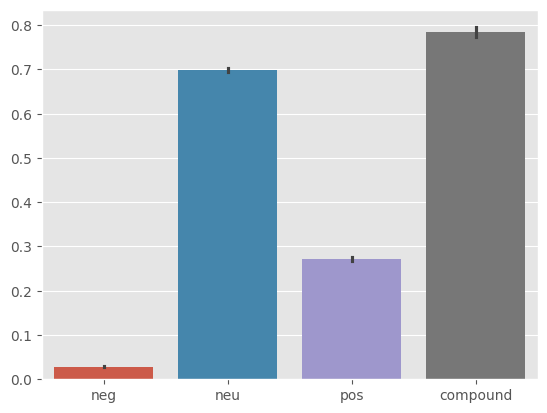

In [ ]:
vaders = pd.DataFrame(res_seq_rec_instructor).T
sns.barplot(data = vaders)

#**Start of Roberta**
####Code should return value between 0-1 for
####(will write more explenation later)
let dic_ans be a dictionary that stores the roberta result of a text
dic_ans[0] stores the negative weight
negative // neutral // poitive

In [ ]:
## start of Roberat
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from tqdm import tqdm
import logging

In [ ]:
pip install torch

In [ ]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
#test 0.0 (neg)
token_text = tokenizer("w", return_tensors='pt')
#print(token_text)
output = model(**token_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
rob_score = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(rob_score)

{'roberta_neg': 0.2511888, 'roberta_neu': 0.53851455, 'roberta_pos': 0.21029657}


In [ ]:
#test 1.0 (pos)
text = 'this is a very good burger'
token_text = tokenizer(text, return_tensors='pt')
output = model(**token_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
rob_score = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(rob_score)

{'roberta_neg': 0.0027693731, 'roberta_neu': 0.019993797, 'roberta_pos': 0.97723687}


In [ ]:
#test 2.0 (neu?)
text = 'the mitochondria is the powerhouse of the cell'
token_text = tokenizer(text, return_tensors='pt')
output = model(**token_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
rob_score = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(rob_score)

{'roberta_neg': 0.0077429013, 'roberta_neu': 0.5576769, 'roberta_pos': 0.43458018}


In [ ]:
def roberta_score(text):
    token_text = tokenizer(text, return_tensors='pt')
    output = model(**token_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    rob_score = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return rob_score

In [ ]:
empty_cells_count = 0
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['seq_rec_instructor']
    if pd.isna(text) or text == '':
      empty_cells_count += 1
      row['seq_rec_instructor'] = "dummytxt"

print(empty_cells_count)

100%|██████████| 3029/3029 [00:00<00:00, 3851.20it/s]

94


In [ ]:
rob_res_seq_rec_instructor = {}
counter = 0
#indexing thing instead of suing text
for i, row in tqdm(df.iterrows(), total=len(df)):
    rob_score = {
          'roberta_neg' : 0,
          'roberta_neu' : 0,
          'roberta_pos' : 0
    }
    rob_res_seq_rec_instructor[i] = rob_score
    try:
        text = row['seq_rec_instructor']
        rob_score = roberta_score(str(text))
        rob_res_seq_rec_instructor[i] = rob_score
    except RuntimeError:
        print("RTE")

print(counter)
print(rob_res_seq_rec_instructor)

  8%|▊         | 236/3029 [01:42<09:46,  4.76it/s]

RTE


 25%|██▍       | 756/3029 [04:10<06:30,  5.82it/s]

RTE


 26%|██▌       | 776/3029 [04:18<14:53,  2.52it/s]

RTE


 34%|███▍      | 1035/3029 [06:06<16:16,  2.04it/s]

RTE


 59%|█████▉    | 1800/3029 [10:43<04:13,  4.84it/s]

RTE


 80%|███████▉  | 2421/3029 [15:04<02:26,  4.16it/s]

RTE


100%|██████████| 3029/3029 [18:16<00:00,  2.76it/s]

0
{0: {'roberta_neg': 0.0035445874, 'roberta_neu': 0.020367669, 'roberta_pos': 0.9760877}, 1: {'roberta_neg': 0.0031989205, 'roberta_neu': 0.04796306, 'roberta_pos': 0.94883806}, 2: {'roberta_neg': 0.003481334, 'roberta_neu': 0.05583781, 'roberta_pos': 0.94068086}, 3: {'roberta_neg': 0.0013962847, 'roberta_neu': 0.009392152, 'roberta_pos': 0.98921156}, 4: {'roberta_neg': 0.23950218, 'roberta_neu': 0.5281888, 'roberta_pos': 0.232309}, 5: {'roberta_neg': 0.002812077, 'roberta_neu': 0.036861137, 'roberta_pos': 0.9603268}, 6: {'roberta_neg': 0.041461617, 'roberta_neu': 0.11749725, 'roberta_pos': 0.8410411}, 7: {'roberta_neg': 0.0015334367, 'roberta_neu': 0.010671227, 'roberta_pos': 0.98779535}, 8: {'roberta_neg': 0.0018487982, 'roberta_neu': 0.01586879, 'roberta_pos': 0.9822824}, 9: {'roberta_neg': 0.07924961, 'roberta_neu': 0.24894157, 'roberta_pos': 0.67180884}, 10: {'roberta_neg': 0.03595654, 'roberta_neu': 0.083367884, 'roberta_pos': 0.88067555}, 11: {'roberta_neg': 0.0030617476, 'robe

In [ ]:
print()
print(len(rob_res_seq_rec_instructor))


3029


In [ ]:
rob_res_seq_rec_course = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    rob_score = {
          'roberta_neg' : 0,
          'roberta_neu' : 0,
          'roberta_pos' : 0
    }
    rob_res_seq_rec_course[i] = rob_score
    try:
        text = row['seq_rec_course']
        rob_score = roberta_score(str(text))
        rob_res_seq_rec_course[i] = rob_score
    except RuntimeError:
        print("RTE")

print(len(rob_res_seq_rec_course))

100%|██████████| 3029/3029 [11:21<00:00,  4.44it/s]

3029


In [ ]:
rob_res_seq_if = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    rob_score = {
          'roberta_neg' : 0,
          'roberta_neu' : 0,
          'roberta_pos' : 0
    }
    rob_res_seq_if[i] = rob_score
    try:
        text = row['seq_if']
        rob_score = roberta_score(str(text))
        rob_res_seq_if[i] = rob_score
    except IndexError as e:
        logging.error(f"IndexError at row {i}: {e}")
    except RuntimeError:
        print("RTE")

print(len(rob_res_seq_if))

 15%|█▌        | 465/3029 [02:07<09:52,  4.33it/s]

RTE


 68%|██████▊   | 2056/3029 [08:38<05:16,  3.08it/s]

RTE


 94%|█████████▍| 2855/3029 [12:07<00:54,  3.21it/s]

RTE


100%|██████████| 3029/3029 [12:46<00:00,  3.95it/s]

3029


In [ ]:
rob_res_seq_vf = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    rob_score = {
          'roberta_neg' : 0,
          'roberta_neu' : 0,
          'roberta_pos' : 0
    }
    rob_res_seq_vf[i] = rob_score
    try:
        text = row['seq_vf']
        rob_score = roberta_score(str(text))
        rob_res_seq_vf[i] = rob_score
    except RuntimeError:
        print("RTE")

print(len(rob_res_seq_vf))

100%|██████████| 3029/3029 [13:28<00:00,  3.75it/s]

3029


In [ ]:
rob_res_seq_effort = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    rob_score = {
          'roberta_neg' : 0,
          'roberta_neu' : 0,
          'roberta_pos' : 0
    }
    rob_res_seq_effort[i] = rob_score
    try:
        text = row['seq_effort']
        rob_score = roberta_score(str(text))
        rob_res_seq_effort[i] = rob_score
    except RuntimeError:
        print("RTE")

print(len(rob_res_seq_effort))

100%|██████████| 3029/3029 [15:16<00:00,  3.31it/s]

3029


In [ ]:
def new_look(dic):
  roberta_neg = []
  roberta_neu = []
  roberta_pos = []
  for key, value in dic.items():
    roberta_neg.append(value['roberta_neg'])
    roberta_neu.append(value['roberta_neu'])
    roberta_pos.append(value['roberta_pos'])
  return roberta_neg, roberta_neu, roberta_pos


In [ ]:
roberta_neg, roberta_neu, roberta_pos = new_look(rob_res_seq_rec_instructor)

In [ ]:
from google.colab import files
columns_to_drop = ['seq_rec_course', 'seq_if', 'seq_vf', 'seq_effort']
df_copy = df.copy()
df_copy.drop(columns=columns_to_drop, inplace=True)
df_copy['roberta_neg'] = roberta_neg
df_copy['roberta_neu'] = roberta_neu
df_copy['roberta_pos'] = roberta_pos
df_copy.to_csv('rob_res_seq_rec_instructor.csv', index=False)
files.download('rob_res_seq_rec_instructor.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
roberta_neg, roberta_neu, roberta_pos = new_look(rob_res_seq_rec_course)

In [ ]:
from google.colab import files
columns_to_drop = ['seq_rec_instructor', 'seq_if', 'seq_vf', 'seq_effort']
df_copy = df.copy()
df_copy.drop(columns=columns_to_drop, inplace=True)
df_copy['roberta_neg'] = roberta_neg
df_copy['roberta_neu'] = roberta_neu
df_copy['roberta_pos'] = roberta_pos
df_copy.to_csv('rob_res_seq_rec_course.csv', index=False)
files.download('rob_res_seq_rec_course.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
roberta_neg, roberta_neu, roberta_pos = new_look(rob_res_seq_if)

In [ ]:
from google.colab import files
columns_to_drop = ['seq_rec_instructor', 'seq_rec_course', 'seq_vf', 'seq_effort']
df_copy = df.copy()
df_copy.drop(columns=columns_to_drop, inplace=True)
df_copy['roberta_neg'] = roberta_neg
df_copy['roberta_neu'] = roberta_neu
df_copy['roberta_pos'] = roberta_pos
df_copy.to_csv('rob_res_seq_if.csv', index=False)
files.download('rob_res_seq_if.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
roberta_neg, roberta_neu, roberta_pos = new_look(rob_res_seq_vf)

In [ ]:
from google.colab import files
columns_to_drop = ['seq_rec_instructor', 'seq_rec_course', 'seq_if', 'seq_effort']
df_copy = df.copy()
df_copy.drop(columns=columns_to_drop, inplace=True)
df_copy['roberta_neg'] = roberta_neg
df_copy['roberta_neu'] = roberta_neu
df_copy['roberta_pos'] = roberta_pos
df_copy.to_csv('rob_res_seq_vf.csv', index=False)
files.download('rob_res_seq_vf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
roberta_neg, roberta_neu, roberta_pos = new_look(rob_res_seq_effort)

In [ ]:
from google.colab import files
columns_to_drop = ['seq_rec_instructor', 'seq_rec_course', 'seq_if', 'seq_vf']
df_copy = df.copy()
df_copy.drop(columns=columns_to_drop, inplace=True)
df_copy['roberta_neg'] = roberta_neg
df_copy['roberta_neu'] = roberta_neu
df_copy['roberta_pos'] = roberta_pos
df_copy.to_csv('rob_res_seq_effort.csv', index=False)
files.download('rob_res_seq_effort.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Multiple emotion Analysis**
Read [more](https://huggingface.co/SamLowe/roberta-base-go_emotions) about the RoBerta pre trained goemotions model used below

In [ ]:
from transformers import pipeline

In [ ]:
multiEmotionModel = pipeline('text-classification',model='SamLowe/roberta-base-go_emotions')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
test = multiEmotionModel(['The professor was very available and orgnized, office hours were especially helpful.',"This class was too hard and the professor was mean and unavailable"])
test

[{'label': 'approval', 'score': 0.5203520655632019},
 {'label': 'disappointment', 'score': 0.40630248188972473}]

In [ ]:
data = []
for text in df['seq_rec_instructor']:
    multi_res = multiEmotionModel(str(text))
    #print(multi_res) #it works yay
    label = multi_res[0]
    print(label)
    score = multi_res[1]
    data.append([text, label, score])

output_df = pd.DataFrame(data, columns=['Text', 'Label', 'Score'])
output_df.head()


{'label': 'joy', 'score': 0.689942479133606}


IndexError: list index out of range